# Project 1
----

### Analysis

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from pprint import pprint

# Import API key
#from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (PNG)
output_us_suicide_vs_age = "../Images/us_suicide_vs_age_line.png"
output_facilities_vs_pop = "../Images/mh_facilities_vs_population.png"

# Output File (CSV)
output_facility_data_file = "../data/cleandata/facilities.csv"
output_population_data_file = "../data/cleandata/population.csv"

## Data Gathering


In [2]:
#Mental Health Facilities in the US
#facilities_file = "../data/rawdata/Behavioral_Health_Treatment_Facility_listing_2019_03_22_215606.csv"
facilities_file = "../data/rawdata/Behavioral_Health_Treament_Facility_listing_2019_03_22_215606.csv"
facilities_df = pd.read_csv(facilities_file)

#Keep only necessary columns
facilities_df_sub = facilities_df[['    name1', 'name2', 'city', 'state', 'zip', 'latitude', 'longitude']]

#Suppress leading spaces on column header for name1
facilities_df_final = facilities_df_sub.rename(columns={"    name1":"name1"})

#Look at data for consistency
facilities_df_final.count()

name1        9686
name2        5430
city         9686
state        9686
zip          9686
latitude     9685
longitude    9685
dtype: int64

In [3]:
#drop one row with no latitude and longitude data
facilities_df_final.dropna(subset=['latitude', 'longitude'], inplace=True)
facilities_df_final.count()

name1        9685
name2        5429
city         9685
state        9685
zip          9685
latitude     9685
longitude    9685
dtype: int64

In [4]:
#remove us territories:  GU (Guam), AS (), PR (Puerto Rico), VI (Virgin Islands) 
#Note: keeping Washington DC in data, so total group of states will be 51
us_facilities_df = facilities_df_final[(facilities_df_final.state != 'GU') & (facilities_df_final.state != 'AS') & (facilities_df_final.state != 'PR') & (facilities_df_final.state != 'VI')]
print(us_facilities_df.count())
print(us_facilities_df.state.unique())

name1        9614
name2        5379
city         9614
state        9614
zip          9614
latitude     9614
longitude    9614
dtype: int64
['TX' 'LA' 'AR' 'MS' 'OK' 'AL' 'MO' 'TN' 'KS' 'NM' 'FL' 'IL' 'KY' 'GA'
 'CO' 'NE' 'IN' 'IA' 'NC' 'SC' 'AZ' 'VA' 'OH' 'SD' 'WI' 'WY' 'WV' 'MN'
 'UT' 'MI' 'PA' 'CA' 'MD' 'ND' 'NV' 'MT' 'DC' 'ID' 'NY' 'DE' 'NJ' 'CT'
 'MA' 'VT' 'OR' 'RI' 'NH' 'WA' 'ME' 'AK' 'HI']


In [5]:
# Export file as a CSV, without the Pandas index, but with the header
us_facilities_df.to_csv(output_facility_data_file, index=False, header=True)


In [6]:
#US Census Bureau population in 50 US States
us_population_file = "../data/rawdata/PopulationEstimatesByState.csv"
pop_df = pd.read_csv(us_population_file)

#rename abbreviation column to state so as to be able to merge data with other files
pop_df = pop_df.rename(columns={"Abbv":"state",
                                "States":"State Name"})

#remove commans in population counts and make it a numeric field
pop_df['Population'] = pop_df['Population'].str.replace(',', '')
pop_df["Population"] = pd.to_numeric(pop_df["Population"])
print(pop_df.head())

## Export file as a CSV, without the Pandas index, but with the header
pop_df.to_csv(output_population_data_file, index=False, header=True)

  state  State Name  Population
0    AL     Alabama     4887871
1    AK      Alaska      737438
2    AZ     Arizona     7171646
3    AR    Arkansas     3013825
4    CA  California    39557045


In [58]:
# Merge two dataframes using an inner join
merge_table = pd.merge(facilities_df_final, pop_df, on="state", how='inner')
merge_table.head()


,name1,name2,city,state,zip,latitude,longitude,State Name,Population
0,Sheltering Harbour,NaN,Spring,TX,77379,30.031183,-95.489886,Texas,28701845
1,Cypress Creek Hospital,NaN,Houston,TX,77090,30.024661,-95.444850,Texas,28701845
2,Intracare North Hospital,NaN,Houston,TX,77090,30.023827,-95.440085,Texas,28701845
3,Tomball Regional Medical Center,Senior Care Behavioral Health,Tomball,TX,77375,30.087405,-95.623617,Texas,28701845
4,Unity Childrens Home,Trickey Road Location,Houston,TX,77067,29.956039,-95.445391,Texas,28701845


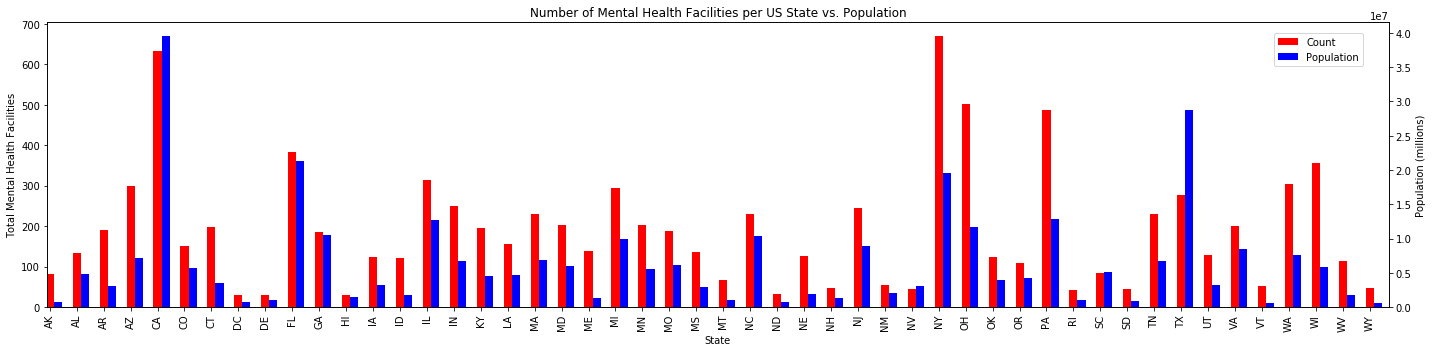

In [65]:
facilities_count_by_state = merge_table.groupby('state').agg({'name1':'count','Population':'mean'})
#facilities_count_by_state['Population'] = facilities_count_by_state['Population']/facilities_count_by_state['name1']
facilities_count_by_state.rename(columns={"name1":"Count"}, inplace=True)
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

facilities_count_by_state.Count.plot(kind='bar', color='red', ax=ax, figsize=(20,5), position=1, align='edge', width=0.3)
facilities_count_by_state.Population.plot(kind='bar', color='blue', ax=ax2, figsize=(20,5), position=0, align='edge', width=0.3)

ax.set_title("Number of Mental Health Facilities per US State vs. Population")
ax.set_xlabel("State")
ax.set_ylabel('Total Mental Health Facilities')
ax2.set_ylabel('Population (millions)')

fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.90))

# Save our graph and show the graph
plt.tight_layout()
plt.savefig(output_facilities_vs_pop)
plt.show()


In [39]:
facilities_count_by_state.rename(columns={"name1":"Facility Count"}, inplace=True)
facilities_count_by_state.head()

,Count,Facility/Population
state,,
AK,82,8993.146341
AL,133,36750.909774
AR,190,15862.236842
AZ,299,23985.438127
CA,634,62392.815457


Text(0, 0.5, 'State Population in Millions')

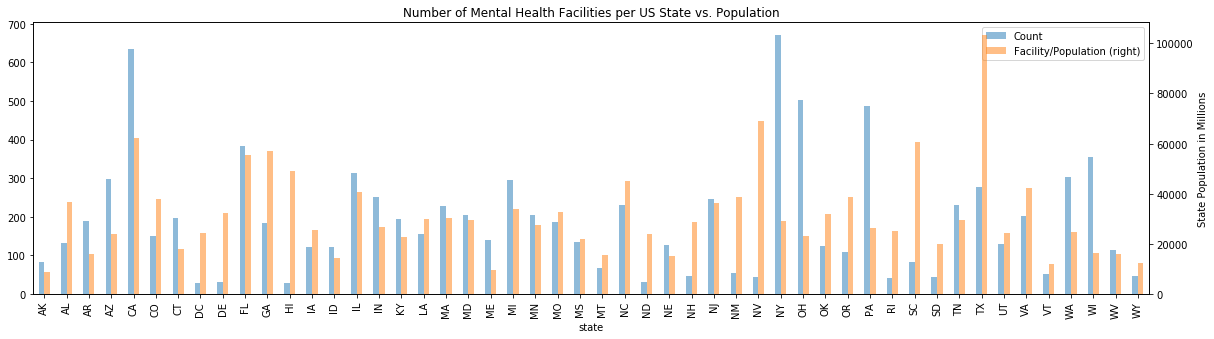

In [41]:
#plot how many mental health facilities found in each state
#facilities_count_by_state = us_facilities_df.groupby('state').name1.count()
facilities_count_by_state.plot.bar(secondary_y= 'Facility/Population', figsize=(20,5), alpha=0.5)


plt.title("Number of Mental Health Facilities per US State vs. Population")
plt.xlabel("State")
plt.ylabel("State Population in Millions")

Text(0, 0.5, 'Count')

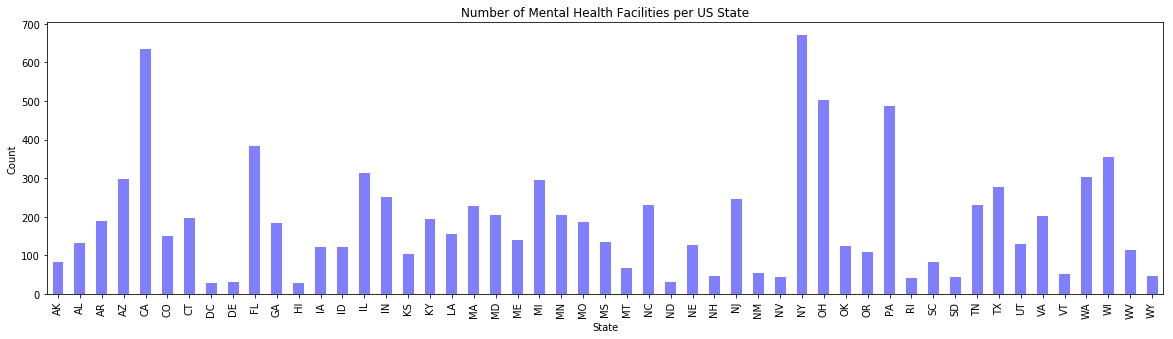

In [146]:
#plot how many mental health facilities found in each state
facilities_count_by_state = us_facilities_df.groupby('state').name1.count()
facilities_count_by_state.plot.bar(figsize=(20,5), color='b', alpha=0.5)
plt.title("Number of Mental Health Facilities per US State")
plt.xlabel("State")
plt.ylabel("Count")

## Use master.csv to create a line plot of suicide totals over time sorted by age group

In [10]:
suicide_us = "../data/cleandata/master.csv"
suicide_df = pd.read_csv(suicide_us)
US_data = suicide_df [suicide_df['country'] == 'United States']
US_data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [11]:
US_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 26848 to 27219
Data columns (total 12 columns):
country               372 non-null object
year                  372 non-null int64
sex                   372 non-null object
age                   372 non-null object
suicides_no           372 non-null int64
population            372 non-null int64
suicides/100k pop     372 non-null float64
country-year          372 non-null object
HDI for year          120 non-null float64
 gdp_for_year ($)     372 non-null object
gdp_per_capita ($)    372 non-null int64
generation            372 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 37.8+ KB


In [19]:
#create a dt with only necessary columnns
US_data_sub=US_data[['year', 'age', 'suicides_no', 'population', 'suicides/100k pop']]
#gather data in groups by year and age range to plot trends
df_age_grp_by_yr=US_data_sub.groupby(['year','age'], as_index=False)
df_tot_by_yr=df_age_grp_by_yr['suicides_no'].sum()
df_tot_by_yr.head()

,year,age,suicides_no
0,1985,15-24 years,5121
1,1985,25-34 years,6376
2,1985,35-54 years,8158
3,1985,5-14 years,278
4,1985,55-74 years,6870


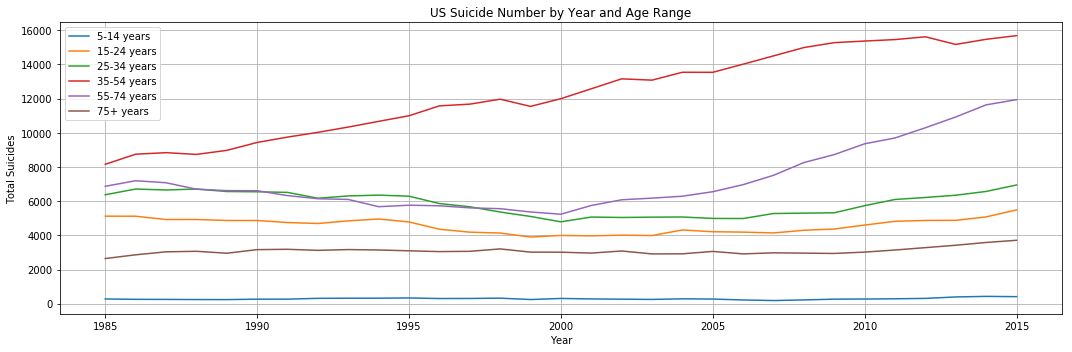

In [27]:
#Line graph age range vs. suicide rate in US
age_grp_1 = df_tot_by_yr.loc[df_tot_by_yr['age']=="5-14 years", 'suicides_no']
age_grp_2 = df_tot_by_yr.loc[df_tot_by_yr['age']=="15-24 years", 'suicides_no']
age_grp_3 = df_tot_by_yr.loc[df_tot_by_yr['age']=="25-34 years", 'suicides_no']
age_grp_4 = df_tot_by_yr.loc[df_tot_by_yr['age']=="35-54 years", 'suicides_no']
age_grp_5 = df_tot_by_yr.loc[df_tot_by_yr['age']=="55-74 years", 'suicides_no']
age_grp_6 = df_tot_by_yr.loc[df_tot_by_yr['age']=="75+ years", 'suicides_no']
time_line = df_tot_by_yr['year'].unique()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(time_line, age_grp_1, label="5-14 years")
ax.plot(time_line, age_grp_2, label="15-24 years")
ax.plot(time_line, age_grp_3, label="25-34 years")
ax.plot(time_line, age_grp_4, label="35-54 years")
ax.plot(time_line, age_grp_5, label="55-74 years")
ax.plot(time_line, age_grp_6, label="75+ years")
ax.legend()

# Incorporate the other graph properties
plt.title(f"US Suicide Number by Year and Age Range" )
plt.ylabel("Total Suicides")
plt.xlabel("Year")
plt.grid(True)


fig.tight_layout()
fig.savefig(output_us_suicide_vs_age)

plt.show()

## work area

In [14]:
df_by_yr=US_data.groupby(['year', 'sex'], as_index=False)
df_tot_by_yr=df_by_yr['suicides_no'].sum()
df_tot_by_yr.head()

,year,sex,suicides_no
0,1985,female,6308
1,1985,male,23138
2,1986,female,6677
3,1986,male,24215
4,1987,female,6522


In [16]:
df_by_yr_world=suicide_df.groupby(['year', 'sex'], as_index=False)
df_tot_by_yr_world=df_by_yr_world['suicides_no'].sum()
df_tot_by_yr_world.head()

,year,sex,suicides_no
0,1985,female,32479
1,1985,male,83584
2,1986,female,33852
3,1986,male,86818
4,1987,female,35006


### Perform API Calls


### Post API call check of data
* Export the city data into a .csv.
* Display the DataFrame info

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.